In [7]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [30]:
from config import weather_api_key
import requests
# Import the datetime module from the datetime library.
from datetime import datetime

url="http://api.openweathermap.org/data/2.5/weather?units=imperial&appid="+weather_api_key

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [ ]:
city_url

In [31]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")#" this is the URL {city_url}")
    # Add 1 to the record count.
    record_count += 1
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except Exception as inst:
        print("City not found. Skipping..." + str(inst))
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 97 | norman wells
Processing Record 2 of Set 97 | jamestown
Processing Record 3 of Set 97 | tuktoyaktuk
Processing Record 4 of Set 97 | lata
Processing Record 5 of Set 97 | puerto ayora
Processing Record 6 of Set 97 | illoqqortoormiut
City not found. Skipping...'coord'
Processing Record 7 of Set 97 | ascension
Processing Record 8 of Set 97 | savinskiy
Processing Record 9 of Set 97 | thompson
Processing Record 10 of Set 97 | inuvik
Processing Record 11 of Set 97 | fort saint john
City not found. Skipping...'coord'
Processing Record 12 of Set 97 | birjand
Processing Record 13 of Set 97 | vaini
Processing Record 14 of Set 97 | rikitea
Processing Record 15 of Set 97 | juegang
Processing Record 16 of Set 97 | maldonado
Processing Record 17 of Set 97 | porto novo
Processing Record 18 of Set 97 | cheuskiny
City not found. Skipping...'coord'
Processing Record 19 of Set 97 | butaritari
Processing Record 20 of Set 97 | anadyr
Processing Record 21 of Set 97 | labuhan
Pr

Processing Record 28 of Set 100 | hami
Processing Record 29 of Set 100 | fethiye
Processing Record 30 of Set 100 | berdigestyakh
Processing Record 31 of Set 100 | tuy hoa
Processing Record 32 of Set 100 | atuona
Processing Record 33 of Set 100 | severo-kurilsk
Processing Record 34 of Set 100 | east london
Processing Record 35 of Set 100 | ponta do sol
Processing Record 36 of Set 100 | melfort
Processing Record 37 of Set 100 | maniitsoq
Processing Record 38 of Set 100 | coquimbo
Processing Record 39 of Set 100 | kieta
Processing Record 40 of Set 100 | tuatapere
Processing Record 41 of Set 100 | clyde river
Processing Record 42 of Set 100 | zerbst
Processing Record 43 of Set 100 | superior
Processing Record 44 of Set 100 | benghazi
Processing Record 45 of Set 100 | dunedin
Processing Record 46 of Set 100 | ullapool
Processing Record 47 of Set 100 | tiksi
Processing Record 48 of Set 100 | belmonte
Processing Record 49 of Set 100 | nenjiang
Processing Record 50 of Set 100 | nemuro
Processi

City not found. Skipping...'coord'
Processing Record 6 of Set 104 | asfi
Processing Record 7 of Set 104 | bagan
Processing Record 8 of Set 104 | half moon bay
Processing Record 9 of Set 104 | manaure
Processing Record 10 of Set 104 | krasnoselkup
Processing Record 11 of Set 104 | cuiluan
Processing Record 12 of Set 104 | kytlym
City not found. Skipping...'coord'
Processing Record 13 of Set 104 | sentyabrskiy
City not found. Skipping...'coord'
Processing Record 14 of Set 104 | bambous virieux
Processing Record 15 of Set 104 | akyab
Processing Record 16 of Set 104 | borba
Processing Record 17 of Set 104 | amderma
City not found. Skipping...'coord'
Processing Record 18 of Set 104 | launceston
Processing Record 19 of Set 104 | eureka
Processing Record 20 of Set 104 | ewa beach
Processing Record 21 of Set 104 | almaznyy
Processing Record 22 of Set 104 | nguiu
City not found. Skipping...'coord'
Processing Record 23 of Set 104 | houston
Processing Record 24 of Set 104 | bocas del toro
Process

Processing Record 36 of Set 107 | bathsheba
Processing Record 37 of Set 107 | santa maria do suacui
Processing Record 38 of Set 107 | coihueco
Processing Record 39 of Set 107 | mafra
Processing Record 40 of Set 107 | trairi
Processing Record 41 of Set 107 | karratha
Processing Record 42 of Set 107 | samarai
Processing Record 43 of Set 107 | zhangye
Processing Record 44 of Set 107 | boyolangu
Processing Record 45 of Set 107 | nyurba
Processing Record 46 of Set 107 | opunake
Processing Record 47 of Set 107 | karaul
City not found. Skipping...'coord'
Processing Record 48 of Set 107 | petrolina de goias
Processing Record 49 of Set 107 | podosinovets
Processing Record 50 of Set 107 | waitati
Processing Record 1 of Set 108 | portoferraio
Processing Record 2 of Set 108 | ongandjera
Processing Record 3 of Set 108 | dzhebariki-khaya
Processing Record 4 of Set 108 | awbari
Processing Record 5 of Set 108 | inhambane
Processing Record 6 of Set 108 | pailon
Processing Record 7 of Set 108 | kuryk
Pr

In [32]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Norman Wells,65.2820,-126.8329,55.44,76,75,10.36,CA,2021-07-26 14:51:20
1,Jamestown,42.0970,-79.2353,80.29,73,1,8.05,US,2021-07-26 14:50:37
2,Tuktoyaktuk,69.4541,-133.0374,44.60,87,90,6.91,CA,2021-07-26 14:51:26
3,Lata,40.1629,-8.3327,83.35,35,0,13.42,PT,2021-07-26 14:51:27
4,Puerto Ayora,-0.7393,-90.3518,73.54,85,96,7.00,EC,2021-07-26 14:51:07
5,Ascension,30.2169,-90.9001,90.03,78,18,3.06,US,2021-07-26 14:51:27
6,Savinskiy,62.9342,40.1361,63.84,49,41,10.25,RU,2021-07-26 14:51:27
7,Thompson,55.7435,-97.8558,57.36,58,20,3.44,CA,2021-07-26 14:55:44
8,Inuvik,68.3499,-133.7218,53.64,90,75,1.14,CA,2021-07-26 14:55:44
9,Birjand,32.8663,59.2211,93.67,11,45,28.77,IR,2021-07-26 14:51:29


In [34]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [35]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

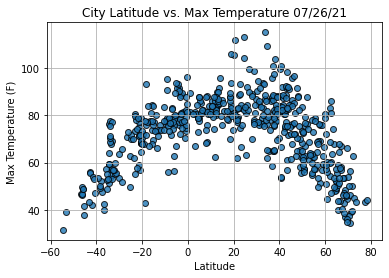

In [36]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

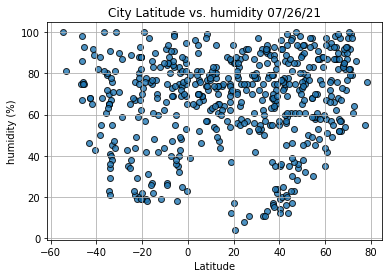

In [41]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. humidity "+ time.strftime("%x"))
plt.ylabel("humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
plt.show()

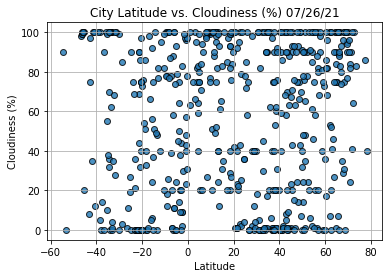

In [42]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

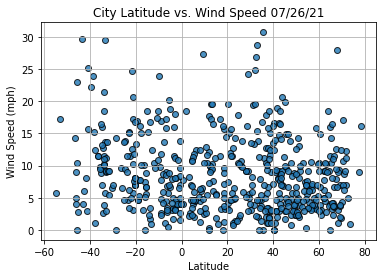

In [43]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()